# <span style="font-size: 42px; font-weight: bold">Intro</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

In [2]:
#import the dataset
df_original = pd.read_csv('education_career_success.csv')

In [3]:
df = df_original.copy()
df.head(5)

,student_id,age,gender,high_school_gpa,sat_score,university_ranking,university_gpa,field_of_study,internships_completed,projects_completed,certifications,soft_skills_score,networking_score,job_offers,starting_salary,career_satisfaction,years_to_promotion,current_job_level,work_life_balance,entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600,9,5,Entry,2,No


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             5000 non-null   object 
 1   age                    5000 non-null   int64  
 2   gender                 5000 non-null   object 
 3   high_school_gpa        5000 non-null   float64
 4   sat_score              5000 non-null   int64  
 5   university_ranking     5000 non-null   int64  
 6   university_gpa         5000 non-null   float64
 7   field_of_study         5000 non-null   object 
 8   internships_completed  5000 non-null   int64  
 9   projects_completed     5000 non-null   int64  
 10  certifications         5000 non-null   int64  
 11  soft_skills_score      5000 non-null   int64  
 12  networking_score       5000 non-null   int64  
 13  job_offers             5000 non-null   int64  
 14  starting_salary        5000 non-null   int64  
 15  care

# <span style="font-size: 42px; font-weight: bold">Task 1: Dataset Selection & Preprocessing</span>

# Dropping columns that are irrelevant to predict the starting salary after graduation

In [5]:
df.columns

Index(['student_id', 'age', 'gender', 'high_school_gpa', 'sat_score',
       'university_ranking', 'university_gpa', 'field_of_study',
       'internships_completed', 'projects_completed', 'certifications',
       'soft_skills_score', 'networking_score', 'job_offers',
       'starting_salary', 'career_satisfaction', 'years_to_promotion',
       'current_job_level', 'work_life_balance', 'entrepreneurship'],
      dtype='object')

In [6]:
# columns_to_drop = ['student_id', 'internships_completed', 'certifications',
#         'job_offers', 'career_satisfaction', 'years_to_promotion',
#        'current_job_level', 'work_life_balance', 'entrepreneurship',
#        'projects_completed', 'soft_skills_score', 'networking_score',]
columns_to_drop = ['student_id', 'internships_completed', 'certifications',
        'job_offers', 'career_satisfaction', 'years_to_promotion',
       'current_job_level', 'work_life_balance', 'entrepreneurship',
       'projects_completed', 'soft_skills_score', 'networking_score',]
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

In [7]:
print(df.columns)

Index(['age', 'gender', 'high_school_gpa', 'sat_score', 'university_ranking',
       'university_gpa', 'field_of_study', 'starting_salary'],
      dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5000 non-null   int64  
 1   gender              5000 non-null   object 
 2   high_school_gpa     5000 non-null   float64
 3   sat_score           5000 non-null   int64  
 4   university_ranking  5000 non-null   int64  
 5   university_gpa      5000 non-null   float64
 6   field_of_study      5000 non-null   object 
 7   starting_salary     5000 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 312.6+ KB


In [9]:
df.head()

,age,gender,high_school_gpa,sat_score,university_ranking,university_gpa,field_of_study,starting_salary
0,24,Male,3.58,1052,291,3.96,Arts,27200
1,21,Other,2.52,1211,112,3.63,Law,25000
2,28,Female,3.42,1193,715,2.63,Medicine,42400
3,25,Male,2.43,1497,170,2.81,Computer Science,57400
4,22,Male,2.08,1012,599,2.48,Engineering,47600


# Handle duplicates and missing values

In [10]:
df[df.duplicated()]

,age,gender,high_school_gpa,sat_score,university_ranking,university_gpa,field_of_study,starting_salary


In [11]:
df.columns[df.isnull().any()]

Index([], dtype='object')

# Handling numeric columns

## Handling outliers

In [12]:
df.describe().round(2)

,age,high_school_gpa,sat_score,university_ranking,university_gpa,starting_salary
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,23.44,3.00,1253.83,504.34,3.02,50563.54
std,3.47,0.58,203.23,291.06,0.58,14494.96
min,18.00,2.00,900.00,1.00,2.00,25000.00
25%,20.00,2.50,1076.00,256.00,2.52,40200.00
50%,23.00,2.99,1257.00,501.50,3.03,50300.00
75%,26.00,3.50,1432.00,759.00,3.51,60500.00
max,29.00,4.00,1600.00,1000.00,4.00,101000.00


In [13]:
print("Number of distinct values in each column:")
for column in df.columns:
    if df[column].dtype != 'object':
        print(f'{column}: {df[column].nunique()}')

Number of distinct values in each column:
age: 12
high_school_gpa: 201
sat_score: 700
university_ranking: 993
university_gpa: 201
starting_salary: 623


In [14]:
def analyze_outliers_iqr(df, column):
    plt.figure(figsize=(3, 3))
    sns.boxplot(y=column, data=df)
    plt.title(column)
    plt.show()

    print("Handling outliers using IQR method for column:", column, '\n')
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_excluded_upper = df[df[column] > upper_bound]
    df_excluded_lower = df[df[column] < lower_bound]
    df_kept = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    print(f"{column} minimum: {df[column].min()}")   
    print(f"{column} 25% quantile (Q1): {Q1}")
    print (f"{column} lower bound: {lower_bound}")
    print(f"Number of lower outliers: {len(df_excluded_lower)}", '\n')
    
    print(f"{column} maximum: {df[column].max()}")
    print(f"{column} 75% quantile (Q3): {Q3}")    
    print (f"{column} upper bound: {upper_bound}")    
    print(f"Number of upper outliers: {len(df_excluded_upper)}", '\n')
    
    print(f"Number of total outliers: {len(df_excluded_upper) + len(df_excluded_lower)}", '\n')
    
    print(f"Number of kept data points: {len(df_kept)}",'\n')
    
    print("Excluded upper outliers:")
    print(df_excluded_upper[column], '\n')

    print("Excluded lower outliers:")
    print(df_excluded_lower[column], '\n')

    return {"df_kept": df_kept, "df_excluded_upper": df_excluded_upper, "df_excluded_lower": df_excluded_lower}

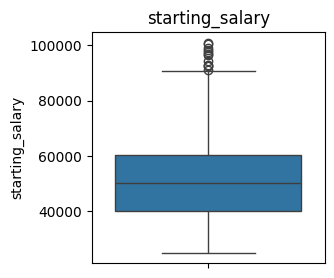

Handling outliers using IQR method for column: starting_salary 

starting_salary minimum: 25000
starting_salary 25% quantile (Q1): 40200.0
starting_salary lower bound: 9750.0
Number of lower outliers: 0 

starting_salary maximum: 101000
starting_salary 75% quantile (Q3): 60500.0
starting_salary upper bound: 90950.0
Number of upper outliers: 12 

Number of total outliers: 12 

Number of kept data points: 4988 

Excluded upper outliers:
16       97500
128      96700
1284     92400
1340     96900
1809    101000
2496     91000
2541     92500
3434     94400
3503     98200
3830     98900
4145     93000
4538    100600
Name: starting_salary, dtype: int64 

Excluded lower outliers:
Series([], Name: starting_salary, dtype: int64) 



In [15]:
df_outliers_starting_salary = analyze_outliers_iqr(df, 'starting_salary')

In [16]:
df_outliers_starting_salary['df_excluded_upper']

,age,gender,high_school_gpa,sat_score,university_ranking,university_gpa,field_of_study,starting_salary
16,20,Female,3.73,1539,116,3.78,Law,97500
128,24,Female,2.62,1039,274,3.60,Arts,96700
1284,18,Female,3.89,1290,213,3.99,Business,92400
1340,25,Female,2.97,900,835,3.07,Law,96900
1809,28,Other,2.34,1089,24,3.01,Arts,101000
2496,19,Male,2.82,1268,937,2.78,Law,91000
2541,19,Male,2.94,1594,569,3.36,Arts,92500
3434,23,Male,2.90,1499,223,2.87,Law,94400
3503,25,Male,3.99,982,459,2.70,Engineering,98200
3830,20,Male,3.23,1238,234,2.82,Arts,98900


In [17]:
df = df_outliers_starting_salary['df_kept'].copy()

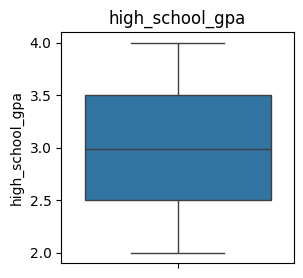

Handling outliers using IQR method for column: high_school_gpa 

high_school_gpa minimum: 2.0
high_school_gpa 25% quantile (Q1): 2.5
high_school_gpa lower bound: 1.0
Number of lower outliers: 0 

high_school_gpa maximum: 4.0
high_school_gpa 75% quantile (Q3): 3.5
high_school_gpa upper bound: 5.0
Number of upper outliers: 0 

Number of total outliers: 0 

Number of kept data points: 4988 

Excluded upper outliers:
Series([], Name: high_school_gpa, dtype: float64) 

Excluded lower outliers:
Series([], Name: high_school_gpa, dtype: float64) 



{'df_kept':       age  gender  high_school_gpa  sat_score  university_ranking  \
 0      24    Male             3.58       1052                 291   
 1      21   Other             2.52       1211                 112   
 2      28  Female             3.42       1193                 715   
 3      25    Male             2.43       1497                 170   
 4      22    Male             2.08       1012                 599   
 ...   ...     ...              ...        ...                 ...   
 4995   26  Female             2.44       1258                 776   
 4996   18  Female             3.94       1032                 923   
 4997   19  Female             3.45       1299                 720   
 4998   19    Male             2.70       1038                 319   
 4999   23  Female             2.19       1145                  82   
 
       university_gpa    field_of_study  starting_salary  
 0               3.96              Arts            27200  
 1               3.63        

In [18]:
analyze_outliers_iqr(df, 'high_school_gpa')

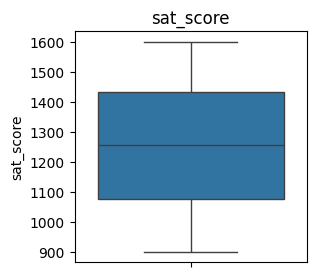

Handling outliers using IQR method for column: sat_score 

sat_score minimum: 900
sat_score 25% quantile (Q1): 1076.0
sat_score lower bound: 542.0
Number of lower outliers: 0 

sat_score maximum: 1600
sat_score 75% quantile (Q3): 1432.0
sat_score upper bound: 1966.0
Number of upper outliers: 0 

Number of total outliers: 0 

Number of kept data points: 4988 

Excluded upper outliers:
Series([], Name: sat_score, dtype: int64) 

Excluded lower outliers:
Series([], Name: sat_score, dtype: int64) 



{'df_kept':       age  gender  high_school_gpa  sat_score  university_ranking  \
 0      24    Male             3.58       1052                 291   
 1      21   Other             2.52       1211                 112   
 2      28  Female             3.42       1193                 715   
 3      25    Male             2.43       1497                 170   
 4      22    Male             2.08       1012                 599   
 ...   ...     ...              ...        ...                 ...   
 4995   26  Female             2.44       1258                 776   
 4996   18  Female             3.94       1032                 923   
 4997   19  Female             3.45       1299                 720   
 4998   19    Male             2.70       1038                 319   
 4999   23  Female             2.19       1145                  82   
 
       university_gpa    field_of_study  starting_salary  
 0               3.96              Arts            27200  
 1               3.63        

In [19]:
analyze_outliers_iqr(df, 'sat_score')

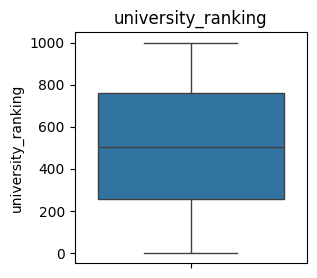

Handling outliers using IQR method for column: university_ranking 

university_ranking minimum: 1
university_ranking 25% quantile (Q1): 256.0
university_ranking lower bound: -498.5
Number of lower outliers: 0 

university_ranking maximum: 1000
university_ranking 75% quantile (Q3): 759.0
university_ranking upper bound: 1513.5
Number of upper outliers: 0 

Number of total outliers: 0 

Number of kept data points: 4988 

Excluded upper outliers:
Series([], Name: university_ranking, dtype: int64) 

Excluded lower outliers:
Series([], Name: university_ranking, dtype: int64) 



{'df_kept':       age  gender  high_school_gpa  sat_score  university_ranking  \
 0      24    Male             3.58       1052                 291   
 1      21   Other             2.52       1211                 112   
 2      28  Female             3.42       1193                 715   
 3      25    Male             2.43       1497                 170   
 4      22    Male             2.08       1012                 599   
 ...   ...     ...              ...        ...                 ...   
 4995   26  Female             2.44       1258                 776   
 4996   18  Female             3.94       1032                 923   
 4997   19  Female             3.45       1299                 720   
 4998   19    Male             2.70       1038                 319   
 4999   23  Female             2.19       1145                  82   
 
       university_gpa    field_of_study  starting_salary  
 0               3.96              Arts            27200  
 1               3.63        

In [20]:
analyze_outliers_iqr(df, 'university_ranking')

### As a conclusion, the only outliers are identified by a starting salary above $90,950. Those records have been excluded.

## Converting salary to thousands of dollars

In [21]:
df['starting_salary'] = (df['starting_salary']/ 1000).astype(float)
# df.head(5)

# Handle non-numeric columns

In [22]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(df[column].value_counts(),"\n")

gender
Male      2452
Female    2345
Other      191
Name: count, dtype: int64 

field_of_study
Arts                745
Mathematics         745
Law                 722
Business            718
Engineering         699
Medicine            689
Computer Science    670
Name: count, dtype: int64 



## Dropping rows where gender is "Other" then encoding the labels

In [23]:
df = df[df['gender'] != 'Other']
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [24]:
df['is_male'] = df['gender'].map({'Male': 1, 'Female': 0})
df.drop('gender', axis=1, inplace=True, errors='ignore')

In [25]:
#df['entrepreneurship'] = df['entrepreneurship'].map({'Yes': 1, 'No': 0})

## One-hot encoding of field_of_study

In [26]:
df = pd.get_dummies(df, columns=['field_of_study'], drop_first=True)

In [27]:
df.head(5)

,age,high_school_gpa,sat_score,university_ranking,university_gpa,starting_salary,is_male,field_of_study_Business,field_of_study_Computer Science,field_of_study_Engineering,field_of_study_Law,field_of_study_Mathematics,field_of_study_Medicine
0,24,3.58,1052,291,3.96,27.2,1,False,False,False,False,False,False
2,28,3.42,1193,715,2.63,42.4,0,False,False,False,False,False,True
3,25,2.43,1497,170,2.81,57.4,1,False,True,False,False,False,False
4,22,2.08,1012,599,2.48,47.6,1,False,False,True,False,False,False
5,24,2.40,1600,631,3.78,68.4,1,False,False,False,True,False,False


# Reorder columns

In [28]:
# df = df[['age', 'high_school_gpa', 'sat_score', 'university_ranking',
#        'university_gpa', 'internships_completed', 'projects_completed',
#        'soft_skills_score', 'networking_score', 'job_offers', 'entrepreneurship', 'is_male',
#        'field_of_study_Business', 'field_of_study_Computer Science',
#        'field_of_study_Engineering', 'field_of_study_Law',
#        'field_of_study_Mathematics', 'field_of_study_Medicine', 'starting_salary']]
# df.head(5)

# Correlation heatmap

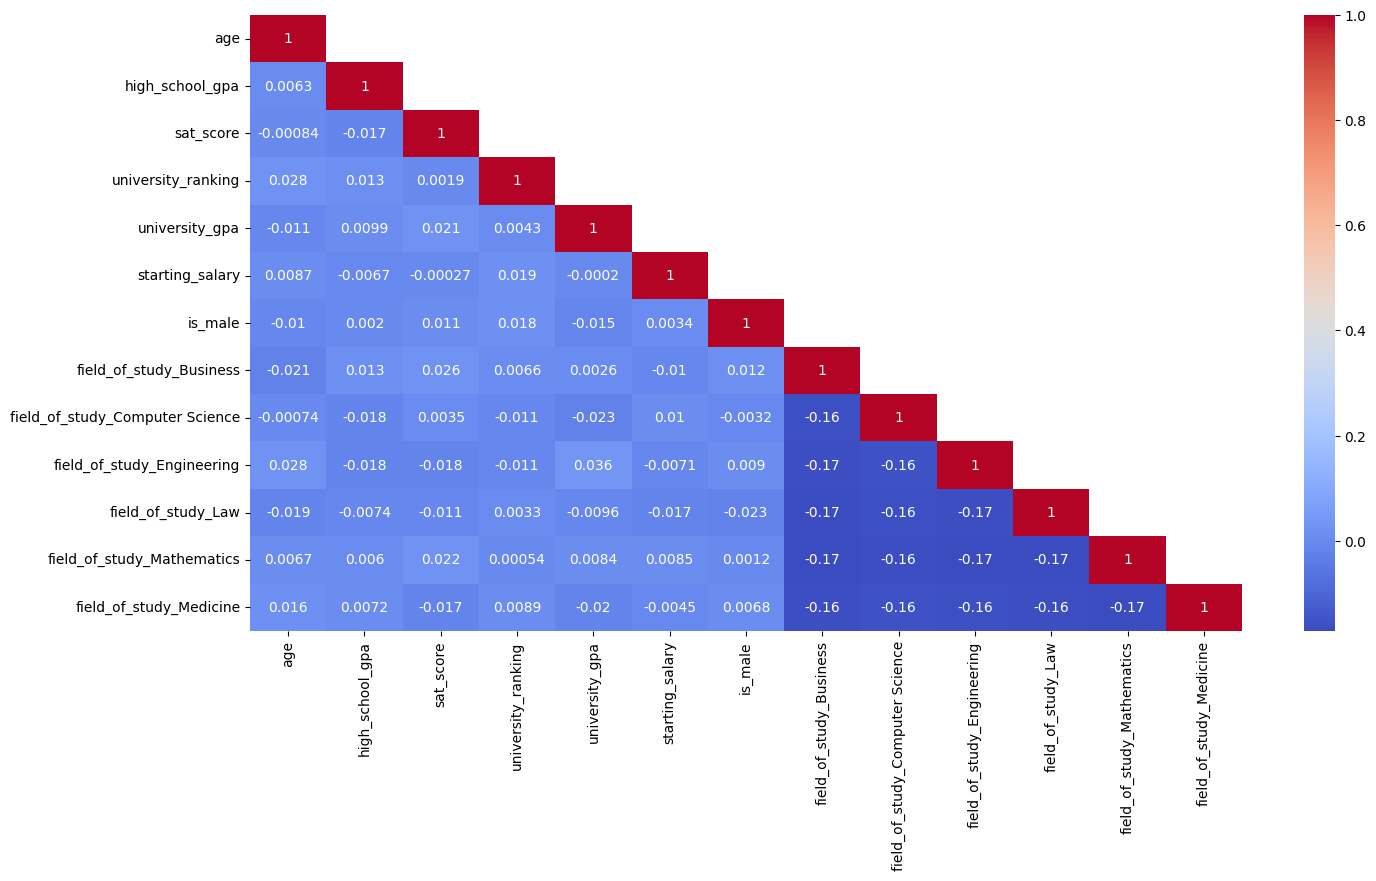

In [29]:
correlation_salary = df.corr()
plt.figure(figsize = (16,8))
m = np.ones_like(correlation_salary)
#type(np.tril_indices_from(m))
#print(np.tril_indices_from(m))
m[np.tril_indices_from(m)]= 0
sns.heatmap(correlation_salary, mask = m, annot = True, cmap = 'coolwarm')
plt.show()

# <span style="font-size: 42px; font-weight: bold">Task 2: Model Building & Evaluation</span>

## Prepare data for model building

In [30]:
df.columns

Index(['age', 'high_school_gpa', 'sat_score', 'university_ranking',
       'university_gpa', 'starting_salary', 'is_male',
       'field_of_study_Business', 'field_of_study_Computer Science',
       'field_of_study_Engineering', 'field_of_study_Law',
       'field_of_study_Mathematics', 'field_of_study_Medicine'],
      dtype='object')

In [31]:
# Assign X and Y values and split them into training and testing sets
# X = df.drop('starting_salary', axis=1)
X = df[['age', 'high_school_gpa', 'sat_score', 'university_ranking','university_gpa', 'is_male']]
# X = df[['university_ranking','university_gpa', 'is_male']]
y = df['starting_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (3837, 6) (3837,)
Testing set shape: (960, 6) (960,)


In [32]:
print("Min salary",f"{np.min(y):,.0f}")
print("Mean salary",f"{np.mean(y):,.0f}")
print("Median salary",f"{np.median(y):,.0f}")
print("Max salary",f"{np.max(y):,.0f}")

print("---------")

print("Min salary square",f"{np.square(np.min(y)):,.0f}")
print("Mean salary square",f"{np.square(np.mean(y)):,.0f}")
print("Median salary square",f"{np.square(np.median(y)):,.0f}")
print("Max salary square",f"{np.square(np.max(y)):,.0f}")

Min salary 25
Mean salary 50
Median salary 50
Max salary 91
---------
Min salary square 625
Mean salary square 2,549
Median salary square 2,530
Max salary square 8,263


## Scaling numeric features using min-max scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
Xtrain = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)
Xtest = pd.DataFrame(X_test_scaled, columns=X_test.columns)



In [33]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
# columns_to_scale = ['age','high_school_gpa', 'sat_score', 'university_ranking','university_gpa','internships_completed','projects_completed','soft_skills_score','networking_score','job_offers']
columns_to_scale = ['age','high_school_gpa', 'sat_score', 'university_ranking','university_gpa']
# columns_to_scale = ['university_ranking','university_gpa']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

## Define a function to calculate regression models metrics

In [34]:
def regression_model_metrics(model, model_name, y_train, y_train_pred, y_test, y_test_pred):

    # Calculate the metrics
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    root_mean_squared_error_train = np.sqrt(mse_train)
    root_mean_squared_error_test = np.sqrt(mse_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Check for overfitting or underfitting
    if r2_train < 0 or r2_test < 0:
        conclusion = "Poor model, worse than mean"
    elif mse_train < mse_test or r2_train > r2_test:
        if abs(r2_train - r2_test) > 0.1:
            conclusion = "May be overfitting"
        else:
            conclusion = "Model OK, check for slight overfitting"
    elif mse_train > mse_test and r2_train < r2_test:
        conclusion = "May be underfitting"
    else:
        conclusion = "Good model"
    
    metrics_dict = {
        "MODEL NAME": model_name,
        "MSE TRAIN": mse_train,
        "MSE TEST": mse_test,
        "R2 TRAIN": r2_train,
        "R2 TEST": r2_test,
        "MAE TRAIN": mae_train,
        "MAE TEST": mae_test,        
        "RMSE TRAIN": root_mean_squared_error_train,
        "RMSE TEST": root_mean_squared_error_test,
        "CONCLUSION": conclusion
    }   
    
    metrics_df = pd.DataFrame(metrics_dict, index=[0])

    # Print the metrics
    for key, value in metrics_dict.items():
        if isinstance(value, (int, float)) and value > 1000:
            print(f"{key}: {value:,.0f}")
        else:
            print(f"{key}: {value}")
    
    
    # print the intercept and coefficients if those attributes exist
    if hasattr(model, 'intercept_') and hasattr(model, 'coef_'):
        print("-----------------")
        print("Intercept:", model.intercept_)
        print("Coefficients:", model.coef_)

    # print feature importances if that attribute exists
    if hasattr(model, 'feature_importances_'):
        print("-----------------")
        print("FEATURE IMPORTANCES:")
        feature_importances = sorted(zip(X.columns, model.feature_importances_), key=lambda x: x[1], reverse=True)
        for feature, importance in feature_importances:
            print(f"{feature}: {importance:.4f}")

    return metrics_df

## Linear Regression

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_train_pred_lin_reg = lin_reg.predict(X_train)
y_test_pred_lin_reg = lin_reg.predict(X_test)
lin_reg_results_df = regression_model_metrics(lin_reg, "Linear", y_train, y_train_pred_lin_reg, y_test, y_test_pred_lin_reg)
eval_regression_results_df = lin_reg_results_df.copy()
#eval_regression_results_df

MODEL NAME: Linear
MSE TRAIN: 205.31275116024113
MSE TEST: 206.90831449968013
R2 TRAIN: 0.0012701655167836057
R2 TEST: -0.004875299833773106
MAE TRAIN: 11.693895932889658
MAE TEST: 11.760136980542695
RMSE TRAIN: 14.328738645122995
RMSE TEST: 14.384307925641751
CONCLUSION: Poor model, worse than mean
-----------------
Intercept: 50.321136222830454
Coefficients: [ 0.53182051 -0.76242446 -0.60080317  1.36230908 -0.03603716  0.00454221]


In [36]:
# Create a DataFrame to compare actual and predicted values side by side
comparison_df = pd.DataFrame({
	'y_train_actual': y_train.values,
	'y_train_pred_lin_reg': y_train_pred_lin_reg
}, index=y_train.index)

display(comparison_df.head(10))

,y_train_actual,y_train_pred_lin_reg
1513,56.9,50.194702
4450,47.9,51.208937
1760,71.1,50.622653
3059,25.5,50.976659
1489,56.7,50.334526
4223,25.0,51.317956
203,37.3,50.710035
929,54.1,50.031137
2949,60.5,50.166961
1675,73.9,50.966723


In [37]:
type(y_train.values)

numpy.ndarray

## Polynomial Regression

In [38]:
# polynomial regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_train_pred_poly = poly_reg.predict(X_train_poly)
y_test_pred_poly = poly_reg.predict(X_test_poly)
poly_reg_results_df = regression_model_metrics(poly_reg, "Polynomial", y_train, y_train_pred_poly, y_test, y_test_pred_poly)
eval_regression_results_df = pd.concat([eval_regression_results_df, poly_reg_results_df], ignore_index=True)
#eval_regression_results_df

MODEL NAME: Polynomial
MSE TRAIN: 204.31685563676004
MSE TEST: 208.91342711785273
R2 TRAIN: 0.006114631170807128
R2 TEST: -0.014613372217470388
MAE TRAIN: 11.665142551363873
MAE TEST: 11.823015365320087
RMSE TRAIN: 14.293944719242482
RMSE TEST: 14.453837798932598
CONCLUSION: Poor model, worse than mean
-----------------
Intercept: 49.52601746718276
Coefficients: [-1.67245729e-16 -2.40473972e+00  1.36408673e+00  9.51528101e-01
 -3.30409178e+00  7.44255198e+00 -1.08337352e-01  3.21691738e+00
 -2.16660874e+00 -1.02916144e-01 -3.15411459e-01  1.63845483e+00
  3.14587814e-01 -2.03582218e+00  2.98156450e+00  5.10055471e+00
 -3.10644564e+00 -3.06464836e+00 -1.71944839e+00 -6.18280694e-01
 -2.46529035e+00  5.46146111e-01  3.46174972e+00 -3.11788515e+00
  1.57468967e+00 -4.37548766e+00  1.05314116e+00 -1.08337352e-01]


In [39]:
# Print all coefficients in a column
print("poly_reg.coef_ size:", poly_reg.coef_.size)
print(X_train.shape)
# for coef in poly_reg.coef_:
# 	print(coef)

poly_reg.coef_ size: 28
(3837, 6)


## Lasso Regression

In [40]:
lasso_reg = Lasso(alpha=1, max_iter=10000)
lasso_reg.fit(X_train, y_train)
y_train_pred_lasso = lasso_reg.predict(X_train)
y_test_pred_lasso = lasso_reg.predict(X_test)
lasso_reg_results_df = regression_model_metrics(lasso_reg, "Lasso", y_train, y_train_pred_lasso, y_test, y_test_pred_lasso)
eval_regression_results_df = pd.concat([eval_regression_results_df, lasso_reg_results_df], ignore_index=True)
#eval_regression_results_df

MODEL NAME: Lasso
MSE TRAIN: 205.57386399343756
MSE TEST: 206.0694688322292
R2 TRAIN: 0.0
R2 TEST: -0.0008013442093590672
MAE TRAIN: 11.705321686724648
MAE TEST: 11.7436150475632
RMSE TRAIN: 14.337847257989518
RMSE TEST: 14.355119951857915
CONCLUSION: Poor model, worse than mean
-----------------
Intercept: 50.572348188689084
Coefficients: [ 0. -0. -0.  0. -0.  0.]


## Lasso Cross-Validation

In [41]:
lasso_cv_model = LassoCV(alphas = np.random.randint(0, 1000, 100), cv =10, max_iter=10000, n_jobs=-1).fit(X_train, y_train)
print("Lasso Best alpha:", lasso_cv_model.alpha_)
print("----------")
lasso_reg_cv = Lasso(alpha=lasso_cv_model.alpha_, max_iter=10000)
lasso_reg_cv.fit(X_train, y_train)
y_train_pred_lasso_cv = lasso_reg_cv.predict(X_train)
y_test_pred_lasso_cv = lasso_reg_cv.predict(X_test)
lasso_reg_cv_results_df = regression_model_metrics(lasso_reg_cv, "LassoCV", y_train, y_train_pred_lasso_cv, y_test, y_test_pred_lasso_cv)
eval_regression_results_df = pd.concat([eval_regression_results_df, lasso_reg_cv_results_df], ignore_index=True)
#eval_regression_results_df

Lasso Best alpha: 969
----------
MODEL NAME: LassoCV
MSE TRAIN: 205.57386399343756
MSE TEST: 206.0694688322292
R2 TRAIN: 0.0
R2 TEST: -0.0008013442093590672
MAE TRAIN: 11.705321686724648
MAE TEST: 11.7436150475632
RMSE TRAIN: 14.337847257989518
RMSE TEST: 14.355119951857915
CONCLUSION: Poor model, worse than mean
-----------------
Intercept: 50.572348188689084
Coefficients: [ 0. -0. -0.  0. -0.  0.]


In [42]:
pd.Series(lasso_reg_cv.coef_, index=X_train.columns)

age                   0.0
high_school_gpa      -0.0
sat_score            -0.0
university_ranking    0.0
university_gpa       -0.0
is_male               0.0
dtype: float64

## Ridge Regression

In [43]:
ridge_reg = Ridge(alpha=5, max_iter=10000)
ridge_reg.fit(X_train, y_train)
y_train_pred_ridge = ridge_reg.predict(X_train)
y_test_pred_ridge = ridge_reg.predict(X_test)
ridge_reg_results_df = regression_model_metrics(ridge_reg, "Ridge", y_train, y_train_pred_ridge, y_test, y_test_pred_ridge)
eval_regression_results_df = pd.concat([eval_regression_results_df, ridge_reg_results_df], ignore_index=True)
#eval_regression_results_df

MODEL NAME: Ridge
MSE TRAIN: 205.31281147458031
MSE TEST: 206.8912123353546
R2 TRAIN: 0.0012698721218061815
R2 TEST: -0.004792241100507466
MAE TRAIN: 11.693967136893146
MAE TEST: 11.759757416907648
RMSE TRAIN: 14.328740749786085
RMSE TEST: 14.38371344039343
CONCLUSION: Poor model, worse than mean
-----------------
Intercept: 50.32400770992655
Coefficients: [ 0.52534077 -0.75002069 -0.59135642  1.34143268 -0.03636201  0.00471047]


## Ridge Cross-Validation

In [44]:
ridge_cv_model = RidgeCV(alphas = np.random.randint(0, 1000, 100), cv =10).fit(X_train, y_train)
print("Ridge Best alpha:", ridge_cv_model.alpha_)
print("----------")
ridge_reg_cv = Ridge(alpha=ridge_cv_model.alpha_, max_iter=10000)
ridge_reg_cv.fit(X_train, y_train)
y_train_pred_ridge_cv = ridge_reg_cv.predict(X_train)
y_test_pred_ridge_cv = ridge_reg_cv.predict(X_test)
ridge_reg_cv_results_df = regression_model_metrics(ridge_reg_cv, "RidgeCV", y_train, y_train_pred_ridge_cv, y_test, y_test_pred_ridge_cv)
eval_regression_results_df = pd.concat([eval_regression_results_df, ridge_reg_cv_results_df], ignore_index=True)
#eval_regression_results_df

Ridge Best alpha: 992
----------
MODEL NAME: RidgeCV
MSE TRAIN: 205.46054200138278
MSE TEST: 206.22207799508797
R2 TRAIN: 0.0005512470790468571
R2 TEST: -0.0015425090999816593
MAE TRAIN: 11.701161959733422
MAE TEST: 11.745989481033224
RMSE TRAIN: 14.33389486501777
RMSE TEST: 14.36043446400867
CONCLUSION: Poor model, worse than mean
-----------------
Intercept: 50.495921899794325
Coefficients: [ 0.1535679  -0.17775484 -0.14435339  0.33396984 -0.01966679  0.00676119]


## Decision Tree Regressor


In [45]:
# decision tree regressor
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)
y_train_pred_decision_tree = decision_tree_reg.predict(X_train)
y_test_pred_decision_tree = decision_tree_reg.predict(X_test)
decision_tree_reg_results_df = regression_model_metrics(decision_tree_reg, "Decision Tree Regressor", y_train, y_train_pred_decision_tree, y_test, y_test_pred_decision_tree)
eval_regression_results_df = pd.concat([eval_regression_results_df, decision_tree_reg_results_df], ignore_index=True)
#eval_regression_results_df


MODEL NAME: Decision Tree Regressor
MSE TRAIN: 0.0
MSE TEST: 437.3778541666667
R2 TRAIN: 1.0
R2 TEST: -1.1241785445362606
MAE TRAIN: 0.0
MAE TEST: 16.973333333333336
RMSE TRAIN: 0.0
RMSE TEST: 20.913580615635063
CONCLUSION: Poor model, worse than mean
-----------------
FEATURE IMPORTANCES:
sat_score: 0.2432
university_ranking: 0.2246
university_gpa: 0.1942
high_school_gpa: 0.1804
age: 0.1347
is_male: 0.0230


## Define a function to calculate classification models metric


# <span style="font-size: 42px; font-weight: bold">Conclusion (README)</span>

In [46]:
# Description of starting salary (in thousand dollars)
y.describe()

count    4797.000000
mean       50.491057
std        14.342570
min        25.000000
25%        40.200000
50%        50.300000
75%        60.400000
max        90.900000
Name: starting_salary, dtype: float64

In [47]:
eval_regression_results_df

,MODEL NAME,MSE TRAIN,MSE TEST,R2 TRAIN,R2 TEST,MAE TRAIN,MAE TEST,RMSE TRAIN,RMSE TEST,CONCLUSION
0,Linear,205.312751,206.908314,0.001270,-0.004875,11.693896,11.760137,14.328739,14.384308,"Poor model, worse than mean"
1,Polynomial,204.316856,208.913427,0.006115,-0.014613,11.665143,11.823015,14.293945,14.453838,"Poor model, worse than mean"
2,Lasso,205.573864,206.069469,0.000000,-0.000801,11.705322,11.743615,14.337847,14.355120,"Poor model, worse than mean"
3,LassoCV,205.573864,206.069469,0.000000,-0.000801,11.705322,11.743615,14.337847,14.355120,"Poor model, worse than mean"
4,Ridge,205.312811,206.891212,0.001270,-0.004792,11.693967,11.759757,14.328741,14.383713,"Poor model, worse than mean"
5,RidgeCV,205.460542,206.222078,0.000551,-0.001543,11.701162,11.745989,14.333895,14.360434,"Poor model, worse than mean"
6,Decision Tree Regressor,0.000000,437.377854,1.000000,-1.124179,0.000000,16.973333,0.000000,20.913581,"Poor model, worse than mean"


<b>Objective</b>: predict the starting salary of a student after graduation based on input variables such as GPA, SAT score, university ranking, gender, etc.

<b>Data source</b>: https://www.kaggle.com/datasets/adilshamim8/education-and-career-success

<b>List of available input variables</b>:
- student_id
- age
- gender
- high_school_gpa
- sat_score
- university_ranking
- university_gpa
- field_of_study
- internships_completed
- projects_completed
- certifications
- soft_skills_score
- networking_score
- job_offers
- career_satisfaction
- years_to_promotion
- current_job_level
- work_life_balance
- entrepreneurship

<b>Output to predict</b>: starting_salary

<b>Approach</b>: Supervised learning - regression models
1. Loaded dataset "education_career_success.csv"
2. Dropping columns that are irrelevant for salary prediction (Student ID, Career Satisfaction, etc.)
3. Checked for duplicates and missing values (none were found)
4. Removed 12 outliers in starting_salary out of 5000 rows (salaries above $90,950 per year)
5. Converted salary values to thousands (salary = salary / 1000) to simplify readability of metrics like MSE
6. Dropped rows where gender = 'other' (only 191 out of 4,988 rows)
7. One-hot encoded field_of_sudy
8. Perpared X and y value for modeling and ested various combinations of input variables. Example:<br>
		X = df[['age', 'high_school_gpa', 'sat_score', 'university_ranking','university_gpa', 'is_male']]<br>
		X = X = df[['university_ranking','university_gpa', 'is_male']]
9. Scaled  input features using MinMaxScaler()
10. Defined a function to compute regression models metrics
11. Evaluated several models: Linear Regression, Polynomial Regression, Lasso Regression, Lasso Cross-Validation, Ridge Regression, Ridge Cross-Validation, Decision Tree Regressor


<b>ANALYSIS</b><br>
Several regression models were tested, including linear, polynomial, lasso, ridge, and decision tree. Unfortunately, none of them produced a good fit—no matter which input variables were selected.

As the above table shows: R² score on training data is close to zero for all models (except Decision Tree) and the R² score for test data is negative. Thsi means the models performed worse than predicting the salary by calculating the average.

The Decision Tree Regressor overfits the training data and is worse than the average for the testing data.

These results are surprising. I expected that variables like university ranking, GPA, and field of study would significantly impact salary. I also expected gender to influence the outcome, as many studies show a wage gap favoring men for similar qualifications.

Additionally, I tested soft skill factors such as Soft Skills Score, Networking Score, and Entrepreneurship, but they did not improve model performance either.


<b>CONCLUSION</b><br>
If this dataset accurately reflects reality, then starting salary after graduation appears to be largely random, or at least not strongly influenced by the variables provided.

Despite testing multiple regression models with a variety of input features (academic performance, university ranking, soft skills, gender, etc.), none of the models were able to reliably predict starting salary. This suggests that either:
- Important factors influencing salary are missing from the dataset (e.g., personal connections, location, industry-specific demand), or
- Salary outcomes are highly variable and not easily explained by structured data alone.

In short, there is no strong, predictable pattern between the available input features and starting salary based on this data.


In [48]:
# def classification_model_metrics(model, model_name, y_train, y_train_pred, y_test, y_test_pred):
#     # Calculate metrics
#     accuracy_train = accuracy_score(y_train, y_train_pred)
#     accuracy_test = accuracy_score(y_test, y_test_pred)
#     precision_score_train = precision_score(y_train, y_train_pred, average='weighted')
#     precision_score_test = precision_score(y_test, y_test_pred, average='weighted')
#     recall_score_train = recall_score(y_train, y_train_pred, average='weighted')
#     recall_score_test = recall_score(y_test, y_test_pred, average='weighted')
#     f1_train = f1_score(y_train, y_train_pred, average='weighted')
#     f1_test = f1_score(y_test, y_test_pred, average='weighted')

#     # Confusion matrix and classification report
#     conf_matrix = confusion_matrix(y_test, y_test_pred)
#     class_report = classification_report(y_test, y_test_pred)    

#     # Compute ROC curve and AUC
#     fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
#     roc_auc = auc(fpr, tpr)

#     # Compute Youden's J statistic for each threshold
#     youden_j = tpr - fpr
#     optimal_threshold_index = np.argmax(youden_j)
#     optimal_threshold = thresholds[optimal_threshold_index]

#     # Plot ROC curve with the optimal threshold marked
#     plt.figure(figsize=(10, 6))
#     #plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
#     plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
#     plt.plot([0, 1], [0, 1], 'k--')
#     #plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', label="Optimal Threshold")
#     plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
#     plt.xlabel("False Positive Rate")
#     plt.ylabel("True Positive Rate")
#     plt.title(f"ROC Curve - {model_name}")
#     #plt.legend()
#     plt.legend(loc='lower right')
#     plt.show()

#     # Create a DataFrame to hold the results
#     metrics_df = pd.DataFrame({
#         'Model': [model_name],
#         'Accuracy (Train)': [accuracy_train],
#         'Accuracy (Test)': [accuracy_test],
#         'Precision Score (Train)': [precision_score_train],
#         'Precision Score (Test)': [precision_score_test],
#         'Recall Score (Train)': [recall_score_train],
#         'Recall Score (Test)': [recall_score_test],
#         'F1 Score (Train)': [f1_train],
#         'F1 Score (Test)': [f1_test],
#         'AUC': [roc_auc],
#         "Youden's J": [youden_j[optimal_threshold_index]],
#         "Youden's J statistic": [youden_j],
#         "Optimal Threshold Index": [optimal_threshold_index],
#         "Optimal Threshold": [optimal_threshold]
#     })

#     # Print the metrics
#     # print(metrics_df.T)

#     # print("Confusion Matrix:")
#     # print(conf_matrix)
#     # print("\nClassification Report:")
#     # print(class_report)

#     return metrics_df